In [1]:
# Primero instalar faiss,sklearn desde una terminal con el siguiente comando
# apt install 

In [2]:
from matplotlib import pyplot as plt
from scipy.io import arff
import pandas as pd
import numpy as np
from collections import Counter
from scipy.spatial.distance import euclidean
import glob
from matplotlib.pyplot import cm
from sampler import Initializer

In [13]:
sdata=glob.glob('data/sintetic/*.arff') #sinteticos 2D
rdata=glob.glob('data/real/*.arff') # reales (muchas dimensiones)

In [19]:
# Cargar Datos
data=arff.loadarff("data/real/iris.arff") 
df=pd.DataFrame(data[0])
df

,sepallength,sepalwidth,petallength,petalwidth,class
0,4.8,3.4,1.9,0.2,b'Iris-setosa'
1,4.5,2.3,1.3,0.3,b'Iris-setosa'
2,4.6,3.4,1.4,0.3,b'Iris-setosa'
3,6.8,3.0,5.5,2.1,b'Iris-virginica'
4,5.0,3.4,1.6,0.4,b'Iris-setosa'
...,...,...,...,...,...
145,6.7,3.3,5.7,2.1,b'Iris-virginica'
146,6.5,2.8,4.6,1.5,b'Iris-versicolor'
147,6.9,3.1,5.1,2.3,b'Iris-virginica'
148,5.7,4.4,1.5,0.4,b'Iris-setosa'


In [4]:
#Separar datos y etiquetas
yi,Xi=df['class'].values,df.drop(columns=['class']).values

In [5]:
#Instaciar Sampler y "entrenar"
sampling='FFT' # puede ser Random, DNet o KMPP
s=Initializer(n_samples=50, algorithm=sampling)
s=s.fit(Xi,yi)

In [7]:
# Calcular la proporcion original
L=set(yi) # Etiquetas
co=Counter(yi) # Contar elementos en cada clase
print
Po=[co[l]/len(yi) for l in L]
print(Po)

# Calcular la proporcion de la muestra
cs=Counter(s.sample_labels_)
Ps=[cs[l]/len(s.sample_labels_) for l in L]
# Calculando la distancia euclidiana muestra vs total

euclidean(Po,Ps)



[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]


0.1336662510384228

In [ ]:
# Graficas datos sinteticos
fig, axes=plt.subplots(2,5)
for ds in sdata:
    ddf=pd.DataFrame(arff

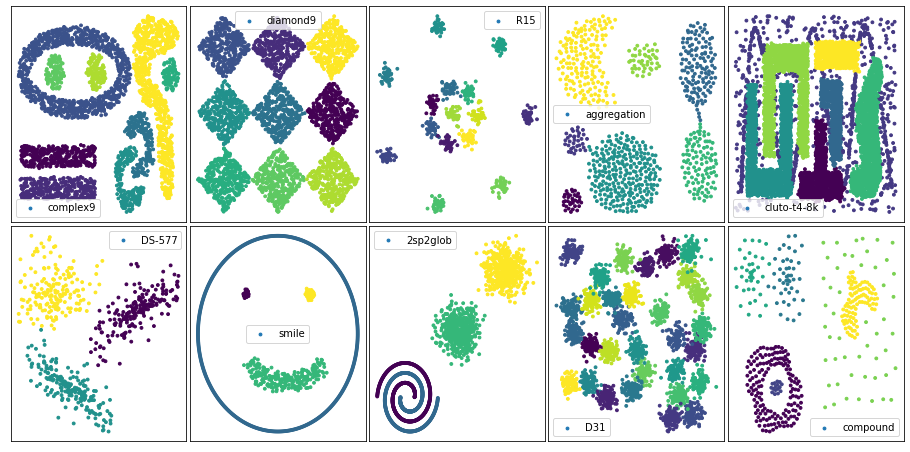

In [78]:
# Graficas datos sinteticos
n,m=2,5
fig, axes=plt.subplots(n,m, figsize=(16,8))
for i,ds in enumerate(sdata):
    ddf=pd.DataFrame(arff.loadarff(ds)[0])
    y,X=ddf['class'].values,ddf.drop(columns=['class']).values
    lc=list(set(y))
    c=[lc.index(l) for l in y]
    ax=axes[i//m,(n*i)%m]
    ax.scatter(X[:,0],X[:,1],c=c,s=8,label=ds.split('/')[-1].split('.')[0])
    ax.set_yticks([])
    ax.set_xticks([])
    ax.legend()
plt.subplots_adjust(wspace=0.02,hspace=0.02)


In [33]:
lc.index(b'5')

0

In [42]:
len(y)

3031

In [46]:
len(X)

150

In [47]:
ddf

,x,y,class
0,660.976,304.225,b'0'
1,636.213,306.174,b'0'
2,662.753,307.565,b'0'
3,657.487,307.740,b'0'
4,635.273,308.157,b'0'
...,...,...,...
3026,554.716,460.908,b'8'
3027,577.082,461.731,b'8'
3028,569.221,462.349,b'8'
3029,556.636,464.758,b'8'
